<a href="https://colab.research.google.com/github/WilliamAshbee/computervision/blob/main/homework2/canny_edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

In [1]:
import matplotlib.pyplot as plt
from scipy import ndimage

import numpy as np
five =np.array([[128,   254,   254,   255,   255],[0,   129,   255,   253,   254],
     [3,    0,   126,   255,   254],
     [0,     0,     0,   126,   255],
     [2,     2 ,    0 ,    0 ,  126]])
print('five by five\n',five)

five by five
 [[128 254 254 255 255]
 [  0 129 255 253 254]
 [  3   0 126 255 254]
 [  0   0   0 126 255]
 [  2   2   0   0 126]]


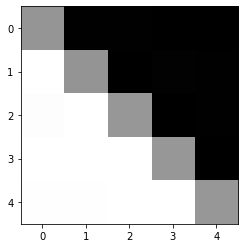

In [2]:

plt.imshow(five,cmap='Greys')

In [3]:
import numpy as np

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [4]:
g = gaussian_kernel(3,1)
print(g)



[[0.05854983 0.09653235 0.05854983]
 [0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]]


gaussian
 [[ 99 151 190 198 198]
 [ 47  99 158 190 198]
 [  8  39  99 158 190]
 [  0   7  39  98 151]
 [  1   0   7  46  98]]


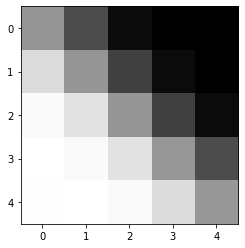

In [5]:
from scipy import ndimage
img = five
img = ndimage.filters.convolve(img,g)
print('gaussian\n',img)
plt.imshow(img,cmap='Greys')

In [6]:

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)


In [7]:
(img,D) = sobel_filters(five)

[[169.55530234 173.88372863  42.05629828   1.05547226   1.20342353]
 [173.56053036 253.66514105 169.22416661  42.72381686   0.74633159]
 [ 42.06689248 169.23305358 254.66819886 169.88907132  42.06027142]
 [  0.74633159  40.72126317 168.55366492 255.         175.82564859]
 [  1.88808617   2.0026178   40.72536655 174.36868059 170.22545809]]
[[-2.35422599 -2.60443199 -2.36413083 -2.03444394 -1.76819189]
 [-2.11541356 -2.3548787  -2.3502774  -2.34838215 -1.89254688]
 [-2.33238946 -2.34436072 -2.35226266 -2.35815912 -2.37206617]
 [-0.32175055 -2.34799795 -2.35619449 -2.35619449 -2.11075542]
 [ 1.57079633  0.78539816 -2.33980252 -2.5997804  -2.35031221]]


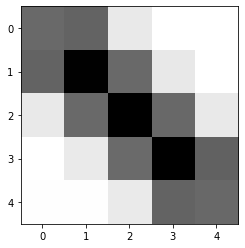

In [8]:
#gradients
print(img)
print(D)
plt.imshow(img,cmap='Greys')


In [9]:
D#theta

array([[-2.35422599, -2.60443199, -2.36413083, -2.03444394, -1.76819189],
       [-2.11541356, -2.3548787 , -2.3502774 , -2.34838215, -1.89254688],
       [-2.33238946, -2.34436072, -2.35226266, -2.35815912, -2.37206617],
       [-0.32175055, -2.34799795, -2.35619449, -2.35619449, -2.11075542],
       [ 1.57079633,  0.78539816, -2.33980252, -2.5997804 , -2.35031221]])

In [10]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [11]:
img = non_max_suppression(img, D)

non max suppression
 [[  0   0   0   0   0]
 [  0 253   0   0   0]
 [  0 169 254 169   0]
 [  0   0   0 255   0]
 [  0   0   0   0   0]]


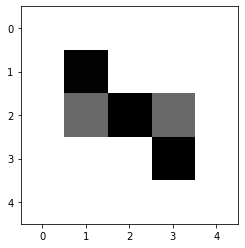

In [12]:
print('non max suppression\n',img)
plt.imshow(img,cmap='Greys')

In [13]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)


In [14]:
post_threshold = threshold(img,lowThresholdRatio=.1,highThresholdRatio=.9)

after thresholding 
  (array([[  0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0],
       [  0,  25, 255,  25,   0],
       [  0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0]], dtype=int32), 25, 255)


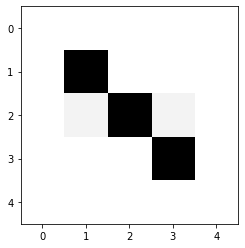

In [15]:
print('after thresholding \n ', post_threshold)
plt.imshow(post_threshold[0],cmap='Greys')

In [16]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img


In [17]:
final_img = hysteresis(post_threshold[0],post_threshold[1],post_threshold[2])

In [18]:
import matplotlib.pyplot as plt

final image after hysteresis
 [[  0   0   0   0   0]
 [  0 255   0   0   0]
 [  0 255 255 255   0]
 [  0   0   0 255   0]
 [  0   0   0   0   0]]


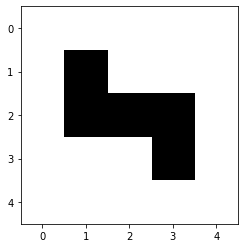

In [19]:
plt.imshow(final_img, cmap="Greys")
print('final image after hysteresis\n',final_img)